In [66]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
npr.seed(0)

In [5]:
dose = np.array([-0.86, -0.30, -0.05, 0.73])
n    = np.array([5, 5, 5, 5])
yobs = np.array([0, 1, 3, 5])

In [52]:
model = pm.Model()
with model:
    alpha = pm.Flat('alpha')
    beta  = pm.Flat('beta')
    theta = pm.math.invlogit(alpha + beta * dose)
    y     = pm.Binomial('y', p=theta, n=n, observed=yobs)
    LD50  = pm.Deterministic('LD50', -alpha/beta)

In [56]:
with model:
    trace = pm.sample(2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:02<00:00, 4355.75draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


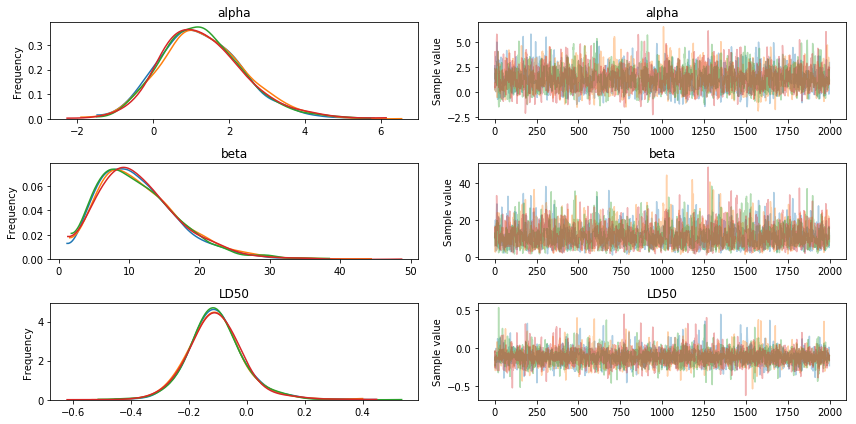

In [57]:
axes = pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0xa2b9aaa58>,
      dtype=object)

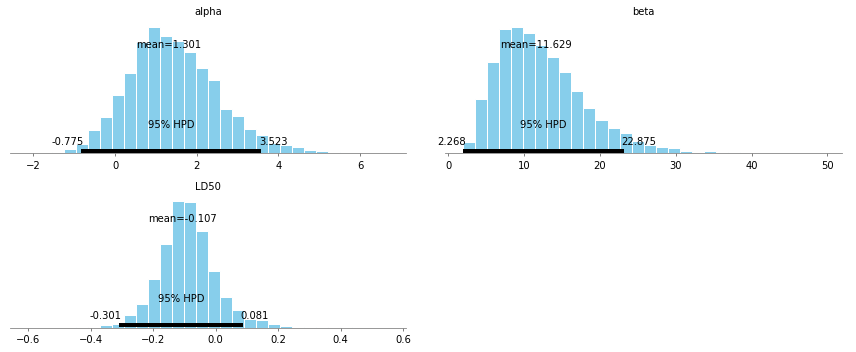

In [58]:
pm.plot_posterior(trace)

In [82]:
with model:
    map = pm.find_MAP()
    
print(map)

/Users/bara947/.local/intelpython3/envs/u18fest_env/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.9824, ||grad|| = 0.00044342: 100%|██████████| 14/14 [00:00<00:00, 1596.14it/s]  

{'alpha': array(0.84657861), 'beta': array(7.74880723), 'LD50': array(-0.10925276)}


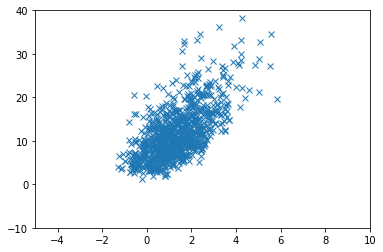

In [83]:
plt.plot(trace.alpha[:1000], trace.beta[:1000], 'x')
plt.xlim([-5, 10]);
plt.ylim([-10, 40]);

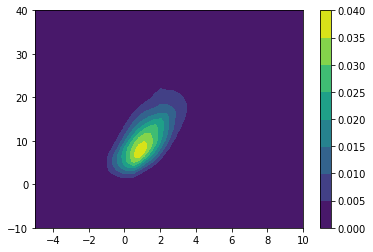

In [84]:
ag, bg = np.mgrid[-5:10:50j, -10:40:50j]
positions = np.vstack([ag.ravel(), bg.ravel()])
kernel = sps.gaussian_kde([trace.alpha, trace.beta])
pdf    = np.reshape(kernel(positions).T, ag.shape)
plt.contourf(ag, bg, pdf)
plt.colorbar()